In [1]:
# Filename: 1.0-initial-data-exploration.ipynb
# Author: Eyosyas Dagnachew
# Description: This file is just to explore the MNIST dataset and get to know it better.

In [114]:
# Imports
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [7]:
# Load in MNIST dataset
train_dataset = torchvision.datasets.MNIST(root="../../data", 
                                           train=True, 
                                           transform=transforms.Compose([transforms.ToTensor()]),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root="../../data",
                                          train=False,
                                          transform=transforms.Compose([transforms.ToTensor()]),
                                          download=True)

0.1%

100.1%

Extracting ../../data\MNIST\raw\train-images-idx3-ubyte.gz to ../../data\MNIST\raw


113.5%

Extracting ../../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../../data\MNIST\raw

7.0%

100.4%

Extracting ../../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../../data\MNIST\raw


180.4%

Extracting ../../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../../data\MNIST\raw
Processing...
Done!


In [11]:
# Init data loader for MNIST dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100,
                                          shuffle=False)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x1b9ccf63b80>,
 <torch.utils.data.dataloader.DataLoader at 0x1b9ccf63af0>)

In [13]:
# How big is the dataset?
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ../../data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ../../data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [111]:
# Understand the train_loader
for batch in train_loader:    # iterates over batches
    print("len(batch) = {} --> batch[0] contains images and batch[1] contains labels.".format(len(batch)))
    print("batch[0].size() = {} --> The images are 28x28 but PyTorch wants that 1 there for some reason.".format(batch[0].size()))
    print("batch[1].size() = {}".format(batch[1].size()))
    break
    # batch is a tensor with size 2, one tensor with the images and one with the labels
    # batch[0] has size 100 

len(batch) = 2 --> batch[0] contains images and batch[1] contains labels.
batch[0].size() = torch.Size([100, 1, 28, 28]) --> The images are 28x28 but PyTorch wants that 1 there for some reason.
batch[1].size() = torch.Size([100])


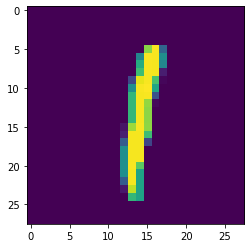

In [136]:
# Visualize a sample
plt.imshow(batch[0][0].view(28,28)) # reshapes batch[0][0] from [1, 28, 28] to [28, 28], can also use plt.imshow(batch[0][0][0])
plt.show()

In [130]:
batch[0][0].size()

torch.Size([1, 28, 28])

In [137]:
# Are the classes balanced?
